# Salary Prediction Analysis

## Overview

This repository contains a comprehensive analysis of the "Salary Data.csv" dataset, aiming to predict salaries based on several features like age, years of experience, gender, and job title. Through extensive data processing, visualization, and machine learning, we've derived valuable insights and built predictive models with impressive accuracy.

## Dataset

The primary dataset used is "Salary Data.csv", which encompasses several features:
- **Age**: The age of the employees.
- **Years of Experience**: The total working experience of the employees.
- **Gender**: The gender of the employees.
- **Job Title**: The designation or role of the employees.
- **Education Level**: The highest educational qualification of the employees.
- **Salary**: The annual salary of the employees (our target variable).

## Procedures and Analysis

### Data Exploration and Visualization:

- Loaded the dataset into a pandas DataFrame for easy manipulation and analysis.
- Conducted a comprehensive overview of the dataset, understanding its structure and content.
- Used statistical measures to understand the distribution and central tendencies of the data.
- Visualized the data using libraries like `matplotlib` and `seaborn` to understand the relationships between different features and the target variable.

### Data Preprocessing:

- Used MinMaxScaler for scaling numeric features.
- Encoded categorical variables to convert them into a format suitable for machine learning.
- Split the dataset into training and testing sets to train and subsequently evaluate our machine learning models.

### Model Training and Evaluation:

- Employed several regression algorithms, including:
    - Linear Regression
    - Decision Tree Regression
    - Extra Tree Regression
    - Gradient Boosting Regression
    - Random Forest Regression
    - Ridge Regression
    - Lasso Regression
    - Elastic Net Regression

- Trained each model on the training set and evaluated their performance on the testing set using R-squared as the metric.

## Results

The R-squared values for each of the models are as follows:

- **Linear Regression**: 0.8556
- **Decision Tree Regression**: 0.8889
- **Extra Tree Regression**: 0.8997
- **Gradient Boosting Regression**: 0.9160
- **Random Forest Regression**: 0.9111
- **Ridge Regression**: 0.9036
- **Lasso Regression**: 0.9027
- **Elastic Net Regression**: 0.9046

The Gradient Boosting Regression model showed the highest R-squared value, indicating it performed the best among all the models in terms of explaining the variance in the dataset.

## Importing the necessary libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR

plt.style.use('fivethirtyeight')

## Reading the dataset

In [42]:
df = pd.read_csv('Salary Data.csv')
print(df.shape)
df.head()

(375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## An overview of the dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## Statistical information of numeric features of the dataset

In [46]:
print(df.describe())

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


## Count of unique values for each categorical columns

In [48]:
for col in ('Gender', 'Education Level', 'Job Title'):
    print(f'for column {col}, there is {df[col].nunique()} unique values.')

for column Gender, there is 2 unique values.
for column Education Level, there is 3 unique values.
for column Job Title, there is 174 unique values.


## EDA (Exploratory data analysis)

### Scatter plot for `Salary` and `Age` features

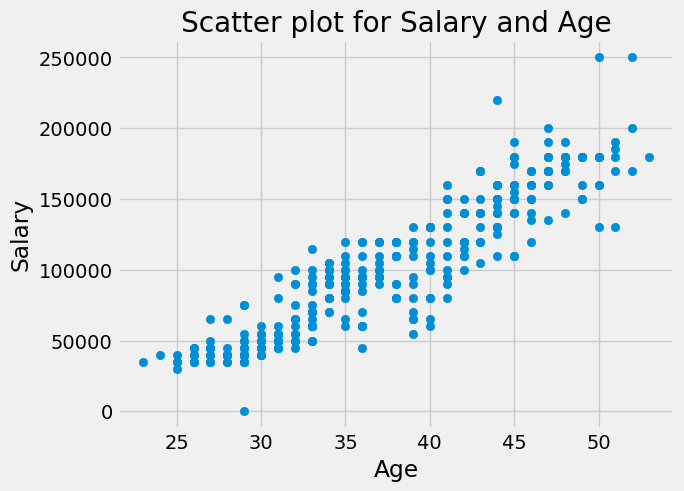

In [58]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter plot for Salary and Age')
plt.show()

### Scatter plot for `Salary` and `Years of Experience`

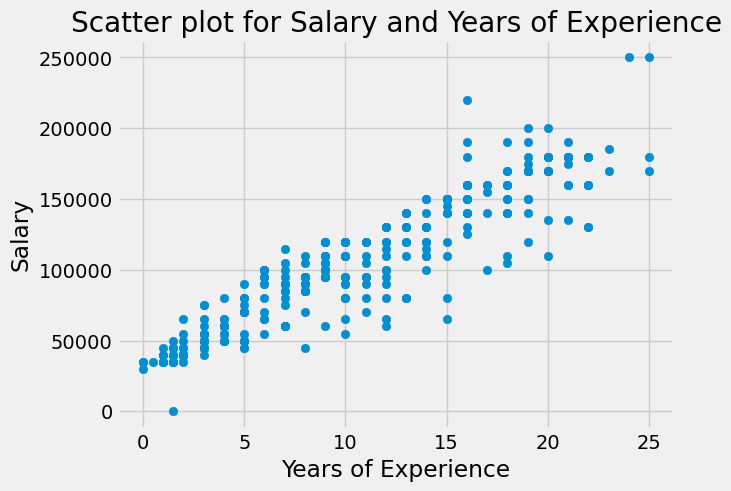

In [61]:
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter plot for Salary and Years of Experience')
plt.show()

### Mean of `Salary` for each `Educational Level`

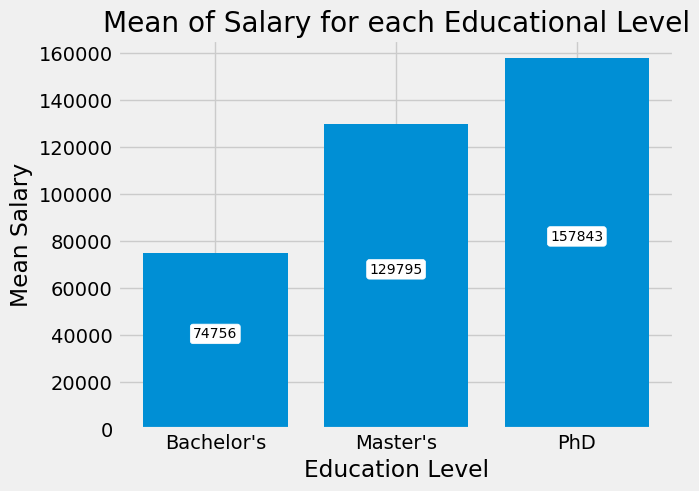

In [64]:

educationSalary = df.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
bars = plt.bar(educationSalary['Education Level'], educationSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.title('Mean of Salary for each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.show()

### Top 5 Mean of `Salary` for each `Job Title`

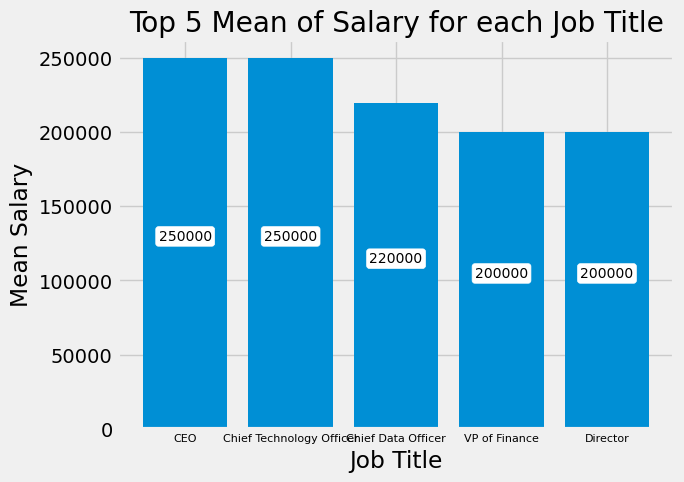

In [67]:
jobTitleSalary = df.groupby('Job Title').agg({'Salary': lambda x: x.mean()}).sort_values('Salary', ascending=False)[:5].reset_index()
bars = plt.bar(jobTitleSalary['Job Title'], jobTitleSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=8)
plt.title('Top 5 Mean of Salary for each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.show()

### Least 5 Mean of `Salary` for each `Job Title`

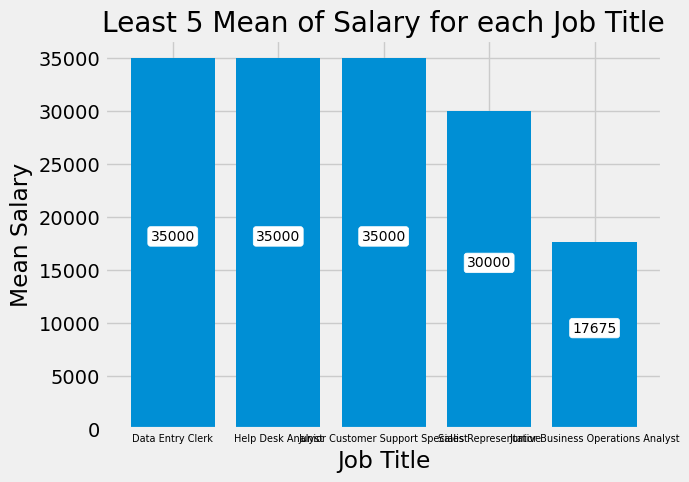

In [70]:
jobTitleSalary = df.groupby('Job Title').agg({'Salary': lambda x: x.mean()}).sort_values('Salary', ascending=False)[-5:].reset_index()
bars = plt.bar(jobTitleSalary['Job Title'], jobTitleSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=7)
plt.title('Least 5 Mean of Salary for each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.show()

### Mean of `Salary` for each `Gender`

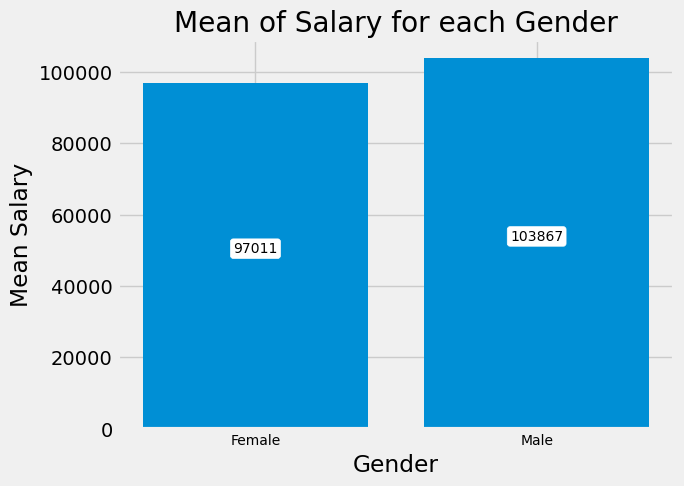

In [73]:
genderSalary = df.groupby('Gender').agg({'Salary': lambda x: x.mean()}).reset_index()
bars = plt.bar(genderSalary['Gender'], genderSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=10)
plt.title('Mean of Salary for each Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.show()

## Defining our data workflow

### Preprocessing our data using `ColumnTransformer`

In [77]:
import numpy as np

cat_features = ['Gender', 'Education Level', 'Job Title']
num_features = ['Age', 'Years of Experience']


df.dropna(inplace=True)

preprocess = ColumnTransformer([
    # ('cat_transform', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df.columns.get_indexer_for(cat_features)),
    ('cat_transform', OneHotEncoder(handle_unknown='infrequent_if_exist'), df.columns.get_indexer_for(cat_features)),
    ('num_features', MinMaxScaler(), df.columns.get_indexer_for(num_features)),
], remainder='passthrough')


### Enhancing our data processing using `Pipeline`

In [80]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), transformer=MinMaxScaler()))
])

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.8)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  array([1, 2, 3], dtype=int64)),
                                                 ('num_features',
                                                  MinMaxScaler(),
                                                  array([0, 4], dtype=int64))])),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=MinMaxScaler()))])

## Defining a dictionary for hyperparameter distrobutions

In [83]:
param_distributions = {
    'LinearRegression': {
        'regressor__fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21)
    },
    'ExtraTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
    },
    'GradientBoostingRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
        'regressor__max_depth': np.arange(1, 11),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__subsample': np.linspace(0.5, 1, 6)
    },
    'RandomForestRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__bootstrap': [True, False]
    },
    'Ridge': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
    },
    'Lasso': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
        # 'regressor__normalize': [True, False],
        'regressor__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__l1_ratio': np.linspace(0, 1, 11),
        'regressor__fit_intercept': [True, False],
        'regressor__selection': ['cyclic', 'random']
    }
}

## Hyperparameter optimizing using `RandomizeSearchCV`

In [86]:
best_models = dict()
best_params = dict()
best_score = dict()
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.8)
for model in param_distributions.keys():
    print(model)
    pipeline.steps[1] = (f"regressor", eval(f"{model}()"))
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions[model],
                                       n_iter=50, cv=5, random_state=42)
    random_search.fit(X_train, y_train)
    best_models[model] = random_search.best_estimator_
    best_params[model] = random_search.best_params_
    best_score[model] = random_search.best_score_

LinearRegression
DecisionTreeRegressor


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreeRegressor
GradientBoostingRegressor
RandomForestRegressor
Ridge


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 26 is smaller than n_iter=50. Running 26 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4291798802.248336, tolerance: 274462512.25
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3776218685.269123, tolerance: 275630000.0
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4246820400.7296605, tolerance: 275375012.25
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: Converg

ElasticNet


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4321519015.700623, tolerance: 274462512.25
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3743277421.7792587, tolerance: 275630000.0
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4220187289.633891, tolerance: 275375012.25
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: Converg

## Plotting the models performances

- we can see that the `GradientBoostingRegressor` has the best performance

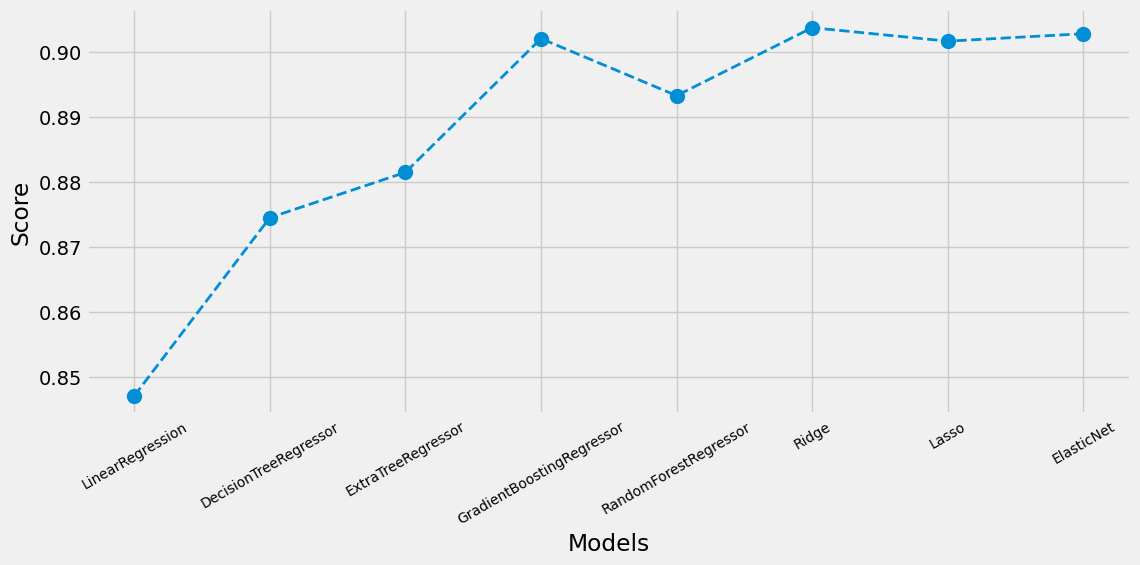

In [88]:
fig = plt.figure(figsize=(12, 5))
df_best_models = pd.DataFrame().from_dict(best_score, orient='index').reset_index()
df_best_models.columns = ['model', 'score']
plt.plot(df_best_models['model'], df_best_models['score'], marker='o', ms=10, linewidth=2, linestyle='dashed')
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

## Plotting the scatter chart of predicted results w.r.t true target variable

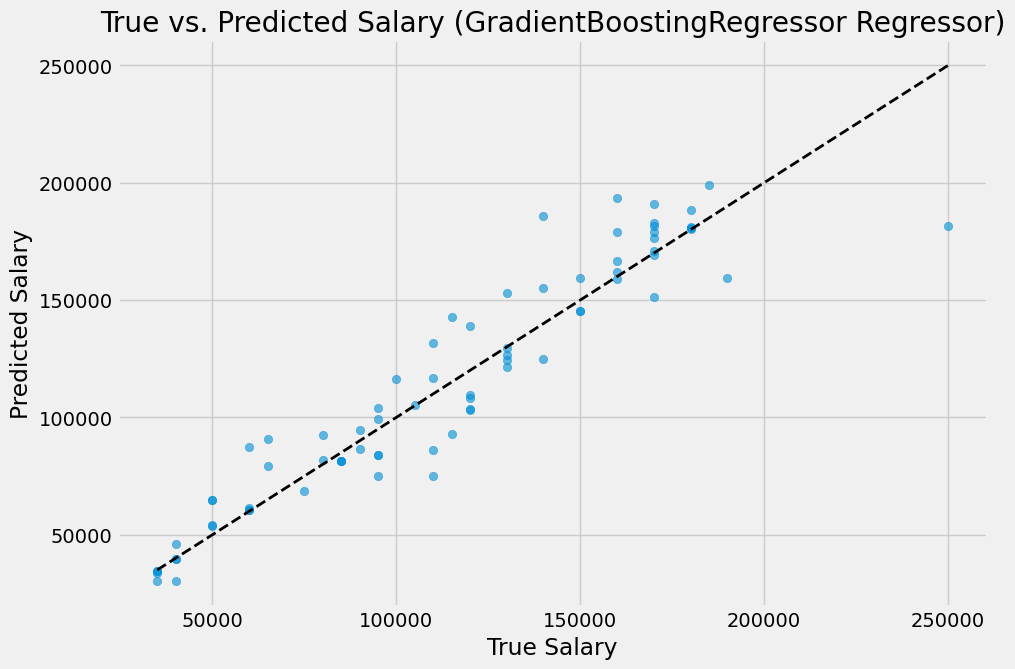

In [91]:
model = 'GradientBoostingRegressor'
y_pred = best_models[model].predict(X_test)
# y_pred = pipeline.predict(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title(f'True vs. Predicted Salary ({model} Regressor)')
plt.grid(True)
plt.show()

In [93]:
best_score

{'LinearRegression': 0.8470439901303315,
 'DecisionTreeRegressor': 0.8745098256504722,
 'ExtraTreeRegressor': 0.8814923383901995,
 'GradientBoostingRegressor': 0.9021067872775044,
 'RandomForestRegressor': 0.8933120497767538,
 'Ridge': 0.9037858258286029,
 'Lasso': 0.9017056876083889,
 'ElasticNet': 0.9028572720885204}